In [2]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Firstly, we read in the data and assign to the data object dass_data.

In [3]:
#read in data and assign to dass_data

dass_data <- read_csv("dass_data.csv")
head(dass_data)

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  major = col_character()
)

See spec(...) for full column specifications.



Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA


In [4]:
#split data and assign training data to dass_train

dass_split <- initial_split(dass_data, prop = 0.75, strata = Q13A)  
dass_train <- training(dass_split)   
dass_test <- testing(dass_split)  

head(dass_train)
head(dass_test)

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA
1,20,4325,1,34,4009,2,38,3604,3,⋯,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng


Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
3,37,4024,3,35,2116,2,18,3408,2,⋯,1,1,1,6,1,60,2,1,2,NA
2,23,3617,3,6,2759,2,25,8769,1,⋯,2,1,1,7,1,60,1,1,3,Civil Engineering
4,23,2453,1,6,7105,4,21,1923,2,⋯,1,1,1,1,4,10,2,1,2,NA
2,28,2984,2,35,3838,1,11,3116,2,⋯,1,1,3,7,2,60,2,1,1,NA
4,12,2431,3,3,9289,4,15,3330,4,⋯,2,1,1,1,2,70,2,1,2,Biology


In [5]:
dass_train_filtered <- select(dass_train, Q13A, TIPI1:TIPI10) %>% filter(TIPI1 > 0 & TIPI2 > 0 & TIPI3 > 0 & TIPI4 > 0 & TIPI5 > 0 & TIPI6 > 0 & TIPI7 > 0 & TIPI8 > 0 & TIPI9 > 0  & TIPI10 > 0)
head(dass_train_filtered)

Q13A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,5,7,7,7,7,7,5,1,1
4,6,5,4,7,5,4,7,7,1,5
1,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3
1,2,1,6,1,7,7,7,2,6,7
2,2,5,6,5,3,2,6,3,5,5


In [6]:
summary(dass_train_filtered)

      Q13A           TIPI1           TIPI2           TIPI3      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :3.000   Median :4.000   Median :5.000   Median :5.000  
 Mean   :2.783   Mean   :3.834   Mean   :4.245   Mean   :4.819  
 3rd Qu.:4.000   3rd Qu.:5.000   3rd Qu.:6.000   3rd Qu.:6.000  
 Max.   :4.000   Max.   :7.000   Max.   :7.000   Max.   :7.000  
     TIPI4           TIPI5           TIPI6           TIPI7      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:5.000   1st Qu.:4.000   1st Qu.:4.000   1st Qu.:5.000  
 Median :6.000   Median :5.000   Median :5.000   Median :6.000  
 Mean   :5.225   Mean   :5.002   Mean   :4.918   Mean   :5.358  
 3rd Qu.:7.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:7.000  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.000  
     TIPI8           TIPI9           TIPI10     
 Min.   :1.000   Min.   :1.000   Min.   :

In [7]:
dass_train_f_piv <- pivot_longer(dass_train_filtered, cols = TIPI1:TIPI10, names_to = "TIPI", values_to = "TIPI_answer")
head(dass_train_f_piv)

Q13A,TIPI,TIPI_answer
<dbl>,<chr>,<dbl>
4,TIPI1,1
4,TIPI2,5
4,TIPI3,7
4,TIPI4,7
4,TIPI5,7
4,TIPI6,7


In [8]:
summary_table <- dass_train_f_piv %>% 
    group_by(TIPI, TIPI_answer) %>% 
    summarize(m_Q13A = mean(Q13A), sd_Q13A = sd(Q13A), n = n())

head(summary_table)

`summarise()` regrouping output by 'TIPI' (override with `.groups` argument)



TIPI,TIPI_answer,m_Q13A,sd_Q13A,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
TIPI1,1,3.123687,1.026378,4568
TIPI1,2,2.923171,1.011711,4074
TIPI1,3,2.836075,1.023458,3404
TIPI1,4,2.824006,1.043476,4324
TIPI1,5,2.673881,1.054154,6099
TIPI1,6,2.482319,1.084478,4468


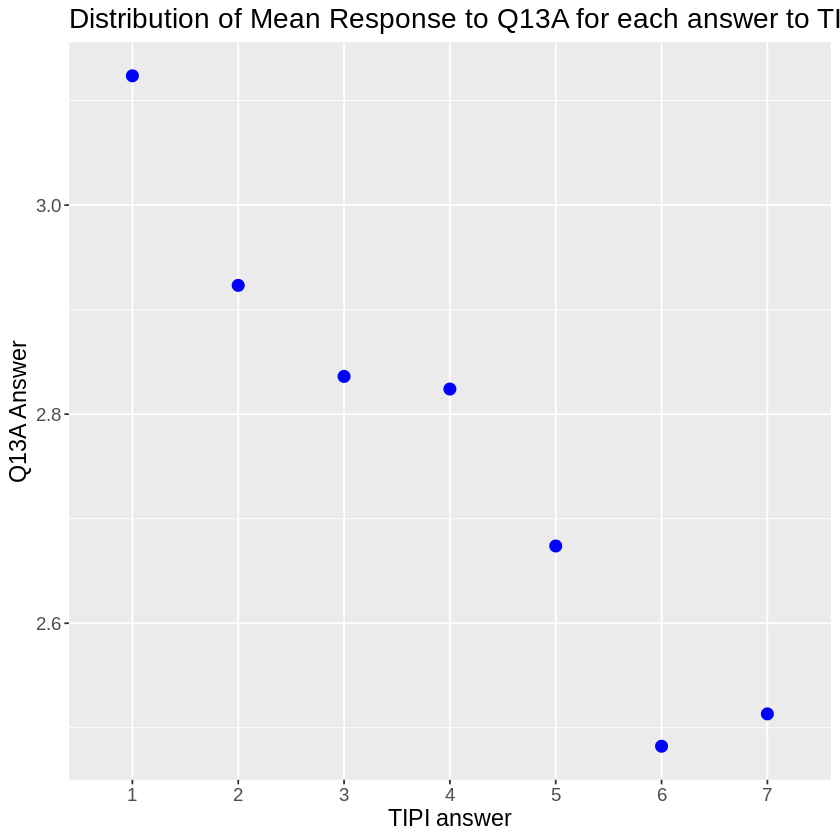

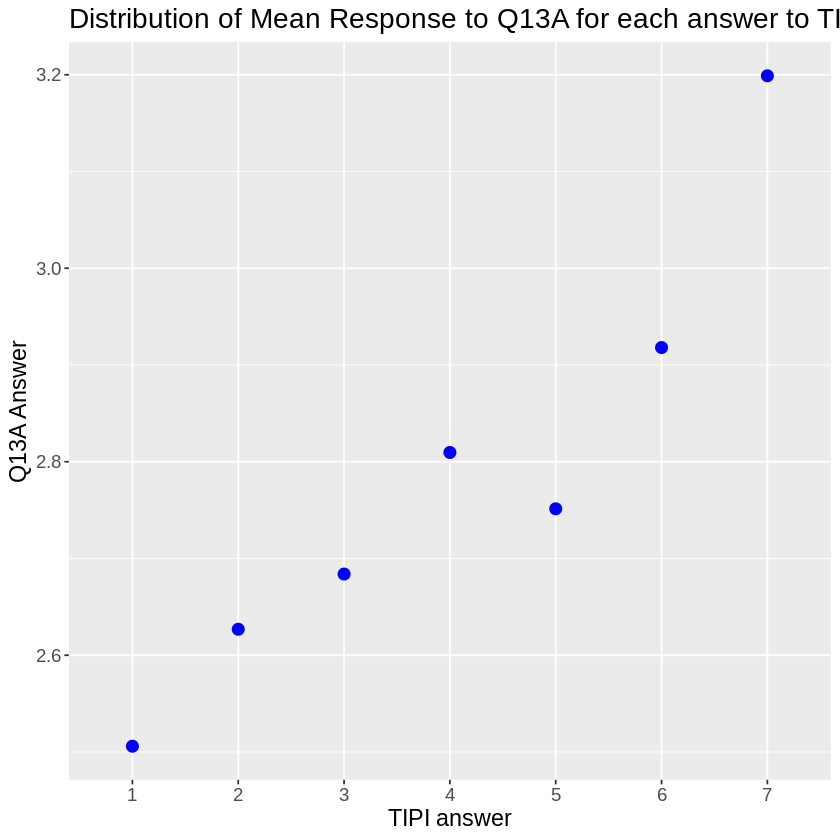

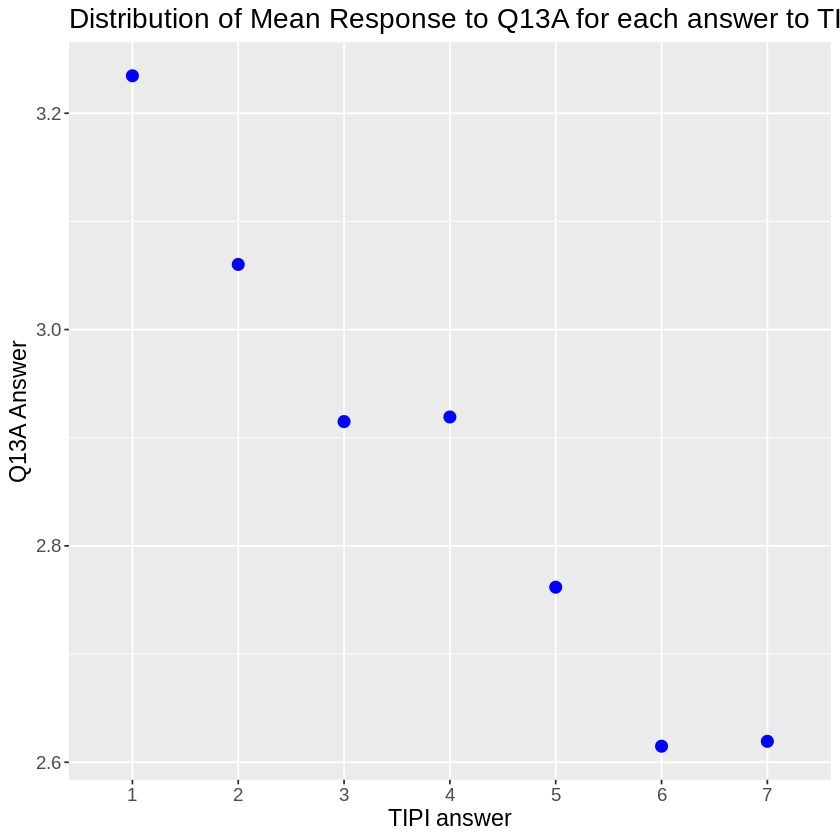

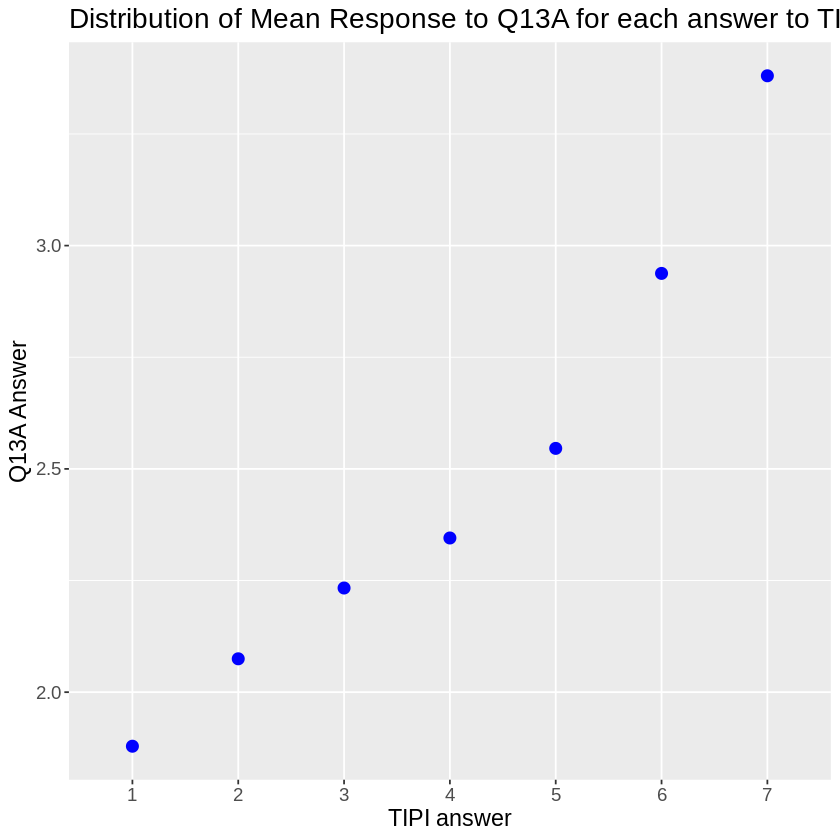

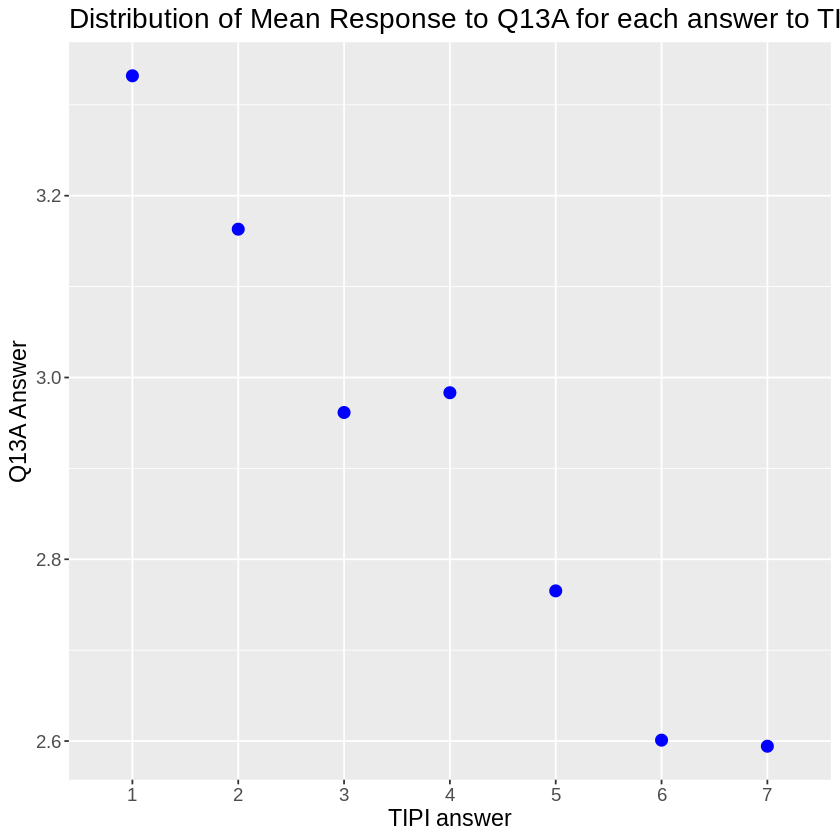

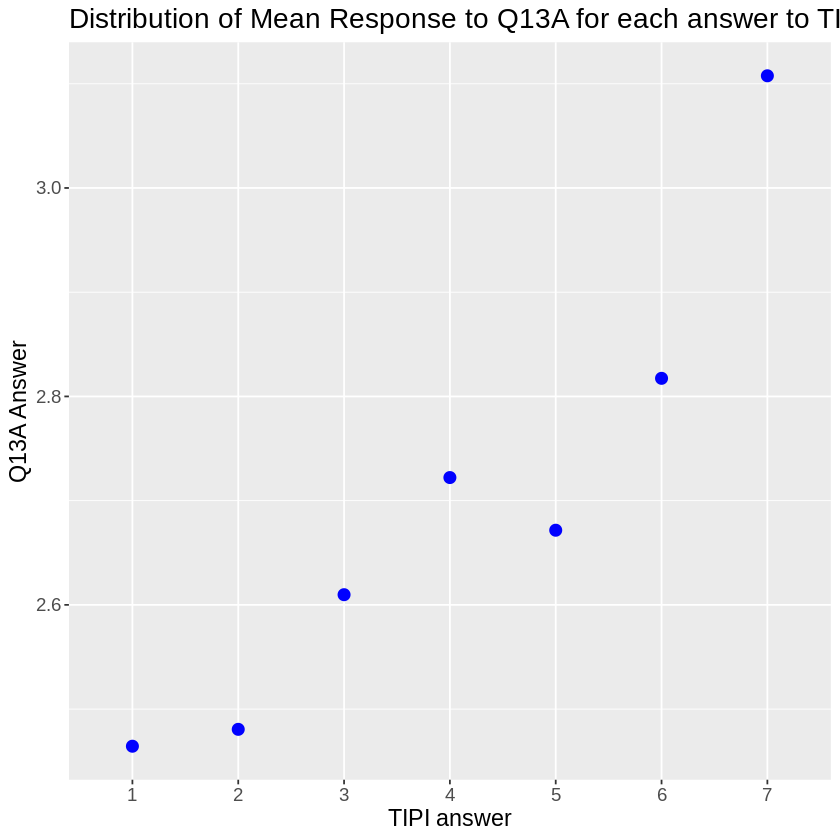

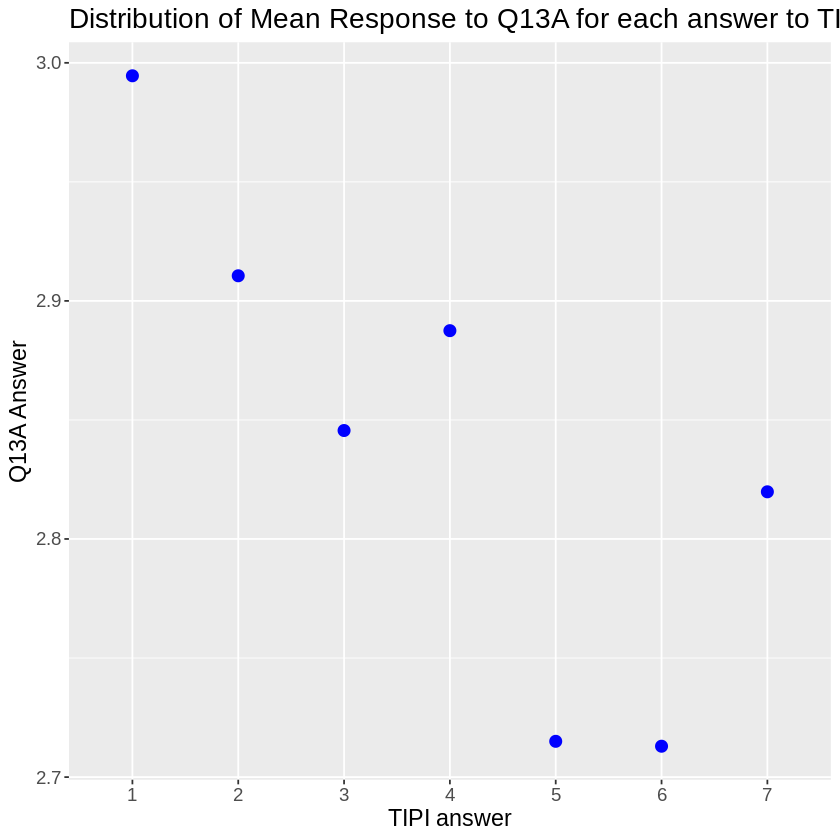

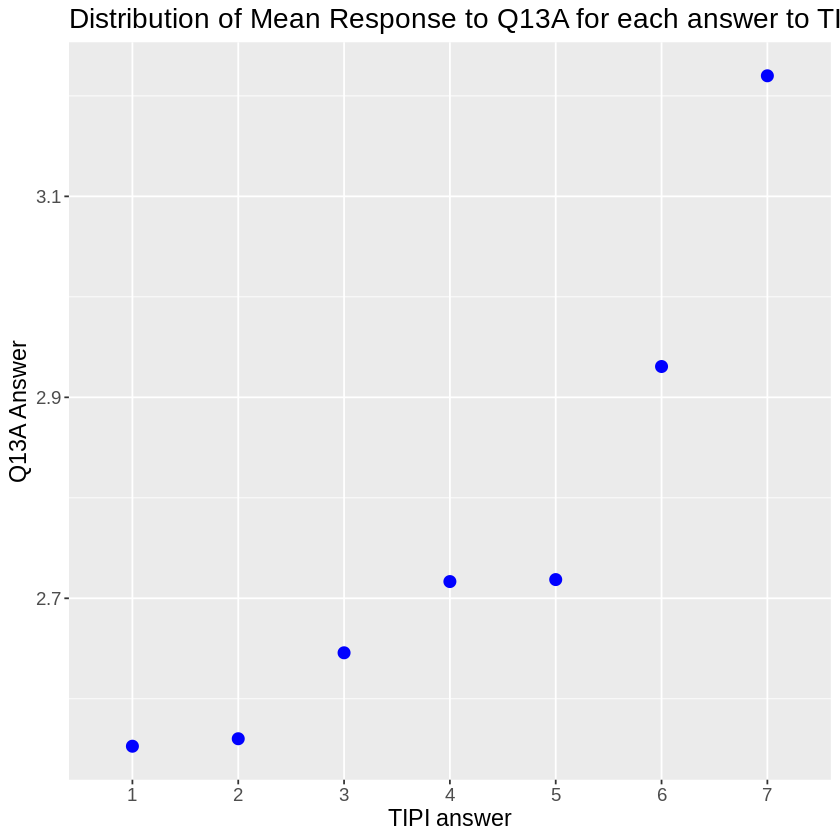

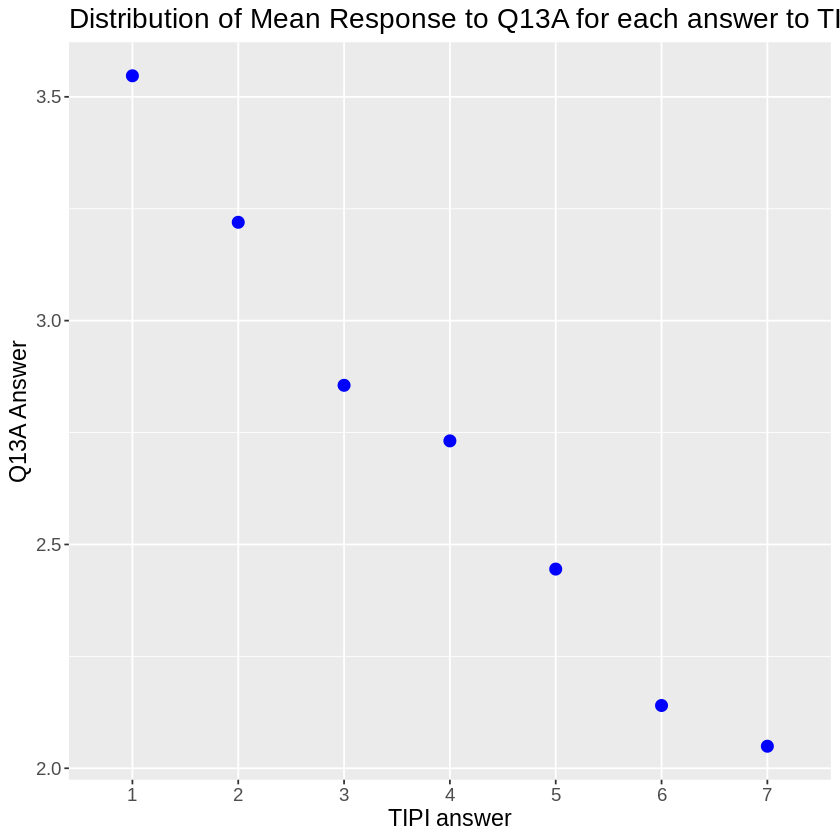

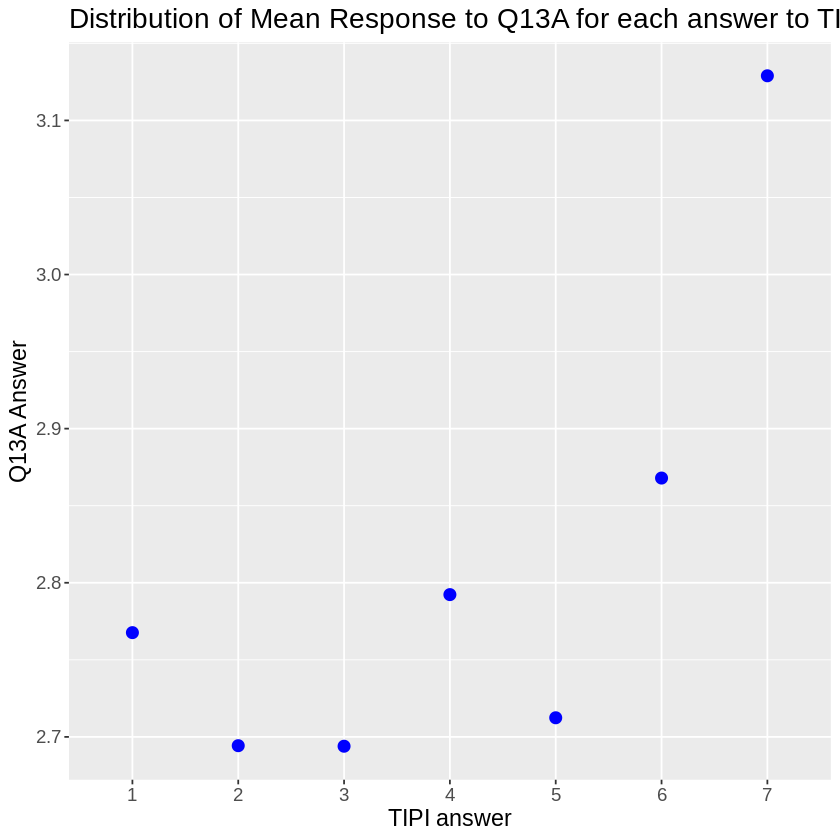

In [9]:
TIPI_vector <- c("TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10")

for (c in TIPI_vector) {
    
    summary <- summary_table %>% filter(TIPI == c)
    
    TIPI_dist <- ggplot(summary, aes(x = TIPI_answer, y = m_Q13A)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Q13A Answer") +
                        scale_x_discrete(name ="TIPI answer", limits=c("1","2","3","4","5","6","7")) +
                        theme(text = element_text(size = 14)) +
                        ggtitle(paste("Distribution of Mean Response to Q13A for each answer to", c))
    
    print(TIPI_dist)
}

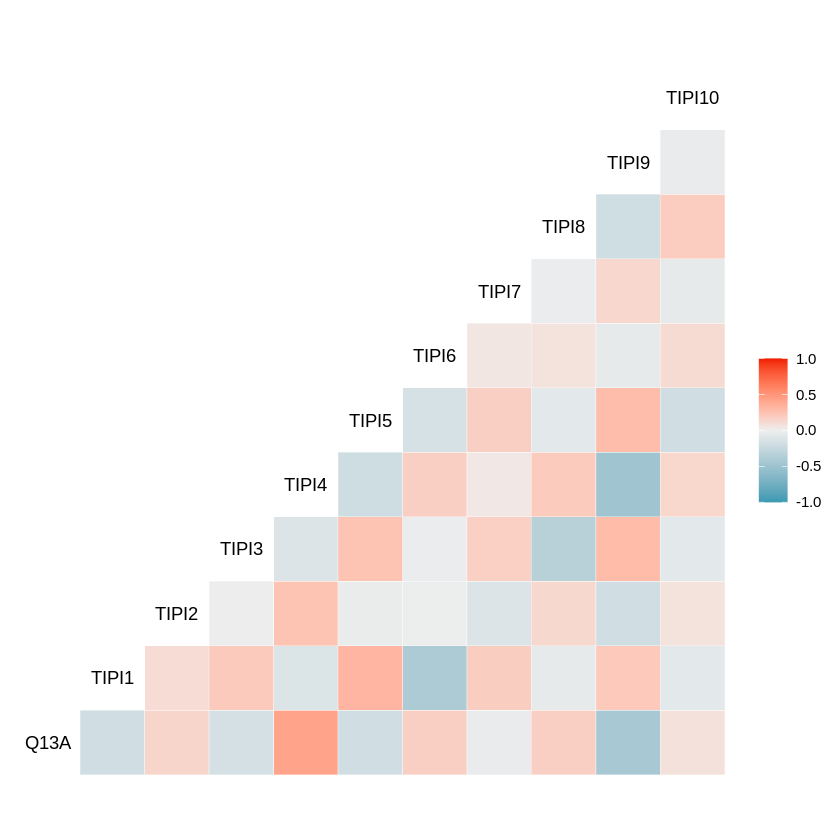

In [10]:
ggcorr(dass_train_filtered)

In [11]:
dass_selected <- dass_data %>%
    select(ends_with("A"))

# | starts_with("TIPI")

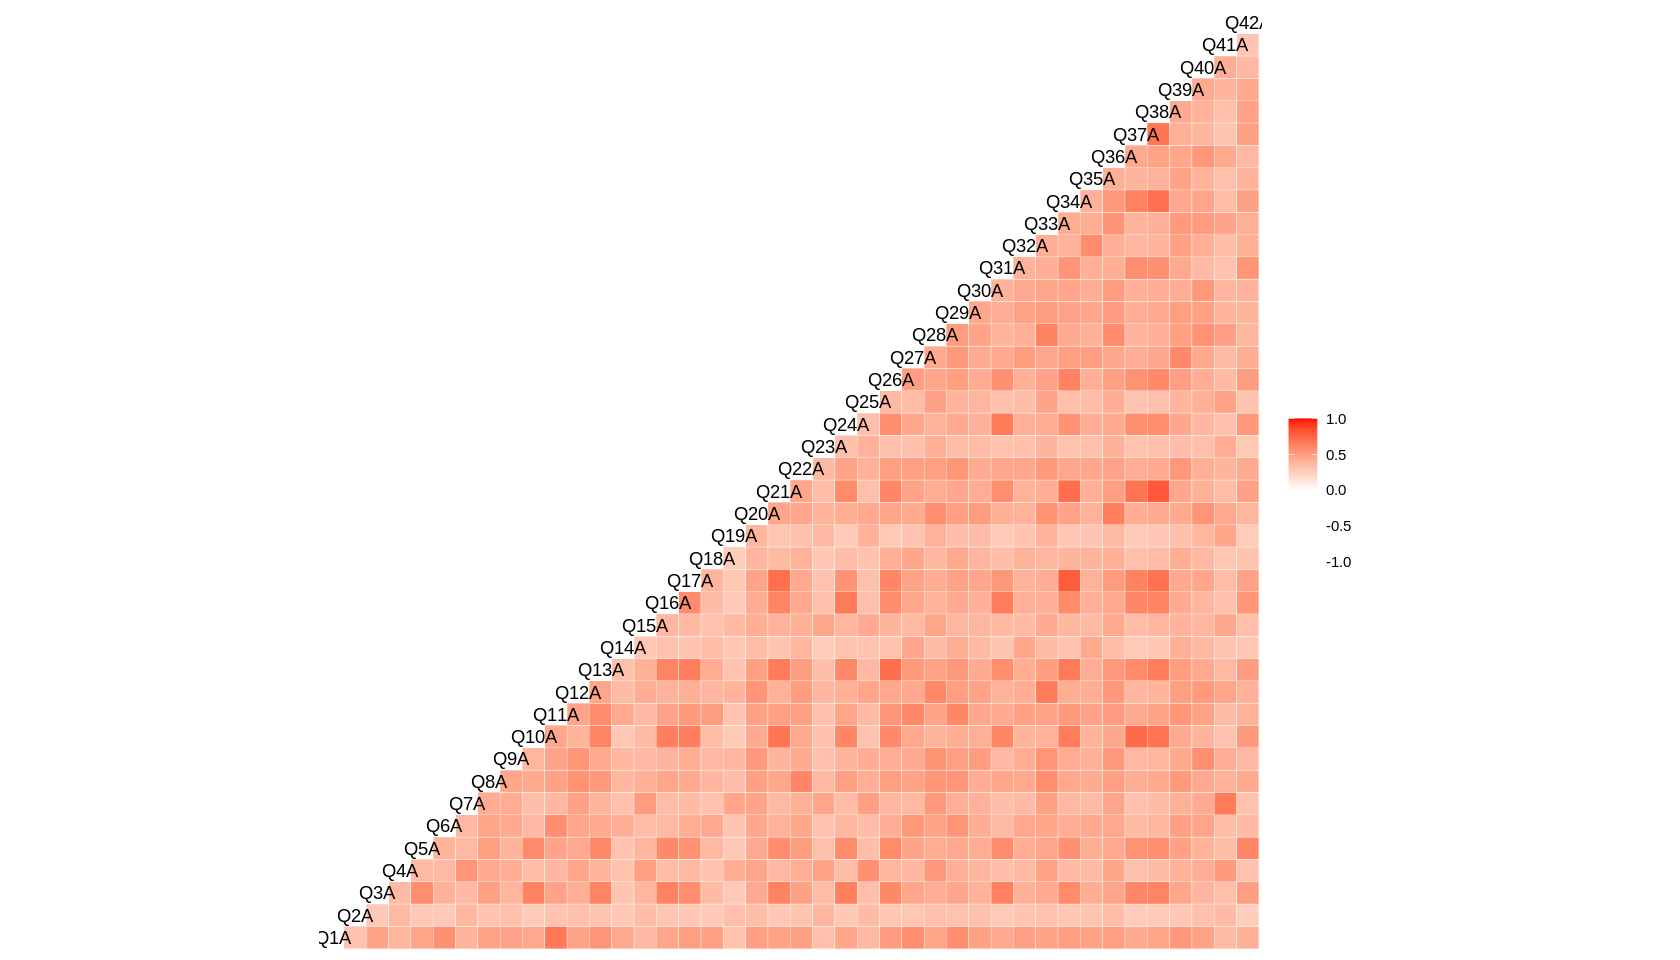

In [12]:
options(repr.plot.width=14, repr.plot.height=8)
ggcorr(dass_selected, low = "white", mid = "white", high = "red")

From the figure, we can determine that the answers to Q3, 5, 10, 11, 16, 17, 21, 24, 26, 31, 34, 37, and 38 are most positively correlated to Q13 (I felt sad and depressed). 

In [13]:
dass_selected_with_TIPI <- dass_data %>%
    select(ends_with("A") | starts_with("TIPI"))

names(dass_selected_with_TIPI)

[1] "Q1A"    "Q2A"    "Q3A"    "Q4A"    "Q5A"    "Q6A"    "Q7A"    "Q8A"   
 [9] "Q9A"    "Q10A"   "Q11A"   "Q12A"   "Q13A"   "Q14A"   "Q15A"   "Q16A"  
[17] "Q17A"   "Q18A"   "Q19A"   "Q20A"   "Q21A"   "Q22A"   "Q23A"   "Q24A"  
[25] "Q25A"   "Q26A"   "Q27A"   "Q28A"   "Q29A"   "Q30A"   "Q31A"   "Q32A"  
[33] "Q33A"   "Q34A"   "Q35A"   "Q36A"   "Q37A"   "Q38A"   "Q39A"   "Q40A"  
[41] "Q41A"   "Q42A"   "TIPI1"  "TIPI2"  "TIPI3"  "TIPI4"  "TIPI5"  "TIPI6" 
[49] "TIPI7"  "TIPI8"  "TIPI9"  "TIPI10"

In [14]:
dass_selected_with_TIPI_split <- initial_split(dass_data, prop = 0.75, strata = Q13A)  
dass_selected_with_TIPI_train <- training(dass_selected_with_TIPI_split)   
dass_selected_with_TIPI_test <- testing(dass_selected_with_TIPI_split)  

In [19]:
# linear regression

lm_spec <- linear_reg() %>%
            set_engine("lm") %>%
            set_mode("regression")

lm_recipe <- recipe(Q13A ~ TIPI1 + TIPI2 + TIPI3 + TIPI4 + TIPI5 + TIPI6 + TIPI7 + TIPI8 + TIPI9 + TIPI10 
                    + Q3A 
                    + Q5A 
                    + Q10A
                    + Q11A
                    + Q16A
                    + Q17A
                    + Q21A
                    + Q24A
                    + Q26A
                    + Q31A
                    + Q34A
                    + Q37A
                    + Q38A, data = dass_selected_with_TIPI_train)

lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = dass_selected_with_TIPI_train)

lm_test_results <- lm_fit %>%
  predict(dass_selected_with_TIPI_test) %>%
  bind_cols(dass_selected_with_TIPI_test) %>%
  metrics(truth = Q13A, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6165154
rsq,standard,0.6703552
mae,standard,0.4729641


In [20]:
coeffs <- lm_fit %>%
             pull_workflow_fit() %>%
             tidy()


coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.221363853,0.025347187,8.7332710,2.600894e-18
TIPI1,0.004800688,0.002288703,2.0975584,3.595257e-02
TIPI2,-0.005442091,0.002128111,-2.5572403,1.055553e-02
TIPI3,0.004412363,0.002298317,1.9198232,5.488976e-02
TIPI4,0.027591083,0.002552270,10.8104102,3.451546e-27
TIPI5,0.006302113,0.002395133,2.6312169,8.512350e-03
TIPI6,0.001922432,0.002154153,0.8924304,3.721695e-01
TIPI7,0.007160427,0.002433908,2.9419469,3.264068e-03
TIPI8,-0.009720665,0.002022578,-4.8060777,1.546689e-06


In [14]:
# Knn using only TIPIs

# dass_recipe <- recipe(Q13A ~ TIPI1 + TIPI2 + TIPI3 + TIPI4 + TIPI5 + TIPI6 + TIPI7 + TIPI8 + TIPI9 + TIPI10, data = dass_selected_with_TIPI) %>%
#     step_scale(all_predictors()) %>%
#     step_center(all_predictors())

# dass_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
#     set_engine("kknn") %>%
#     set_mode("regression")

# dass_fit <- workflow() %>%
#     add_recipe(dass_recipe) %>%
#     add_model(dass_spec) %>%
#     fit(data = dass_train)

# dass_summary <- dass_fit %>%
#           predict(dass_test) %>%
#           bind_cols(dass_test) %>%
#           metrics(truth = Q13A, estimate = .pred)

# dass_summary

In [15]:
# dass_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
#     set_engine("kknn") %>%
#     set_mode("regression")

# dass_workflow <- workflow() %>%
#     add_recipe(dass_recipe) %>%
#     add_model(dass_spec_tune)

# dass_vfold <- vfold_cv(dass_train, v = 5, strata = Q13A)

# gridvals <- tibble(neighbors = seq(from = 90, to = 110, by = 1))

# dass_results <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals) %>%
#                     collect_metrics()

# dass_min <- dass_results %>%
#    filter(.metric == "rmse") %>%
#    arrange(mean, std_err) %>% 
#    slice(1)

# dass_min

In [16]:
# Knn using only TIPIs minus TIPI7 and TIPI10

# dass_recipe <- recipe(Q13A ~ TIPI1 + TIPI2 + TIPI3 + TIPI4 + TIPI5 + TIPI6 + TIPI8 + TIPI9, data = dass_selected_with_TIPI) %>%
#     step_scale(all_predictors()) %>%
#     step_center(all_predictors())

# dass_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
#     set_engine("kknn") %>%
#     set_mode("regression")

# dass_fit <- workflow() %>%
#     add_recipe(dass_recipe) %>%
#     add_model(dass_spec) %>%
#     fit(data = dass_train)

# dass_summary <- dass_fit %>%
#           predict(dass_test) %>%
#           bind_cols(dass_test) %>%
#           metrics(truth = Q13A, estimate = .pred)

# dass_summary

In [17]:
# dass_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
#     set_engine("kknn") %>%
#     set_mode("regression")

# dass_workflow <- workflow() %>%
#     add_recipe(dass_recipe) %>%
#     add_model(dass_spec_tune)

# dass_vfold <- vfold_cv(dass_train, v = 5, strata = Q13A)

# gridvals <- tibble(neighbors = seq(from = 100, to = 120, by = 1))

# dass_results <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals) %>%
#                     collect_metrics()

# dass_min <- dass_results %>%
#    filter(.metric == "rmse") %>%
#    arrange(mean, std_err) %>% 
#    slice(1)

# dass_min

ERROR: Error in linear_reg() %>% set_engine("lm") %>% set_mode("regression"): could not find function "%>%"
